# Google Stock Prediction

**Dateset Reference:**  “Google Stock Prediction,” www.kaggle.com. https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction/data (accessed Mar. 28, 2024).

Feature explanation:
symbol : - Name of the company (in this case Google).
*   date :- year and date
*   close:- closing of stock value
*   high:- highest value of stock at that day
*   low:- lowest value of stock at that day
*   open:- opening value of stock at that day
*   volume:- the total number of shares or contracts traded for the stock on the given date
*   adjClose
*   adjHigh
*   adjLow
*   adjOpen
*   adjVolume
*   divCash: This represent any cash dividends paid out by the company on that date
*   splitFactor: This attribute indicate if there was any stock split that occurred on that date and by what factor.
Adjusted features refers to how stock prices are adjusted for corporate actions like stock splits or dividends. In this project the adjusted features droped.

In [102]:
# @title Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import optimizers
from keras.optimizers import Adam
import time
import itertools

In [3]:
df =pd.read_csv('GOOG.csv')

In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [5]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [7]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [11]:
# @title ##Drop the unecesary freatures
df=df.drop(columns=['symbol','adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'])

In [12]:
# @title ##Sort by date
df = df.sort_values(by='date')

In [13]:
# @title Format the date
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [14]:
df = df.set_index('date')

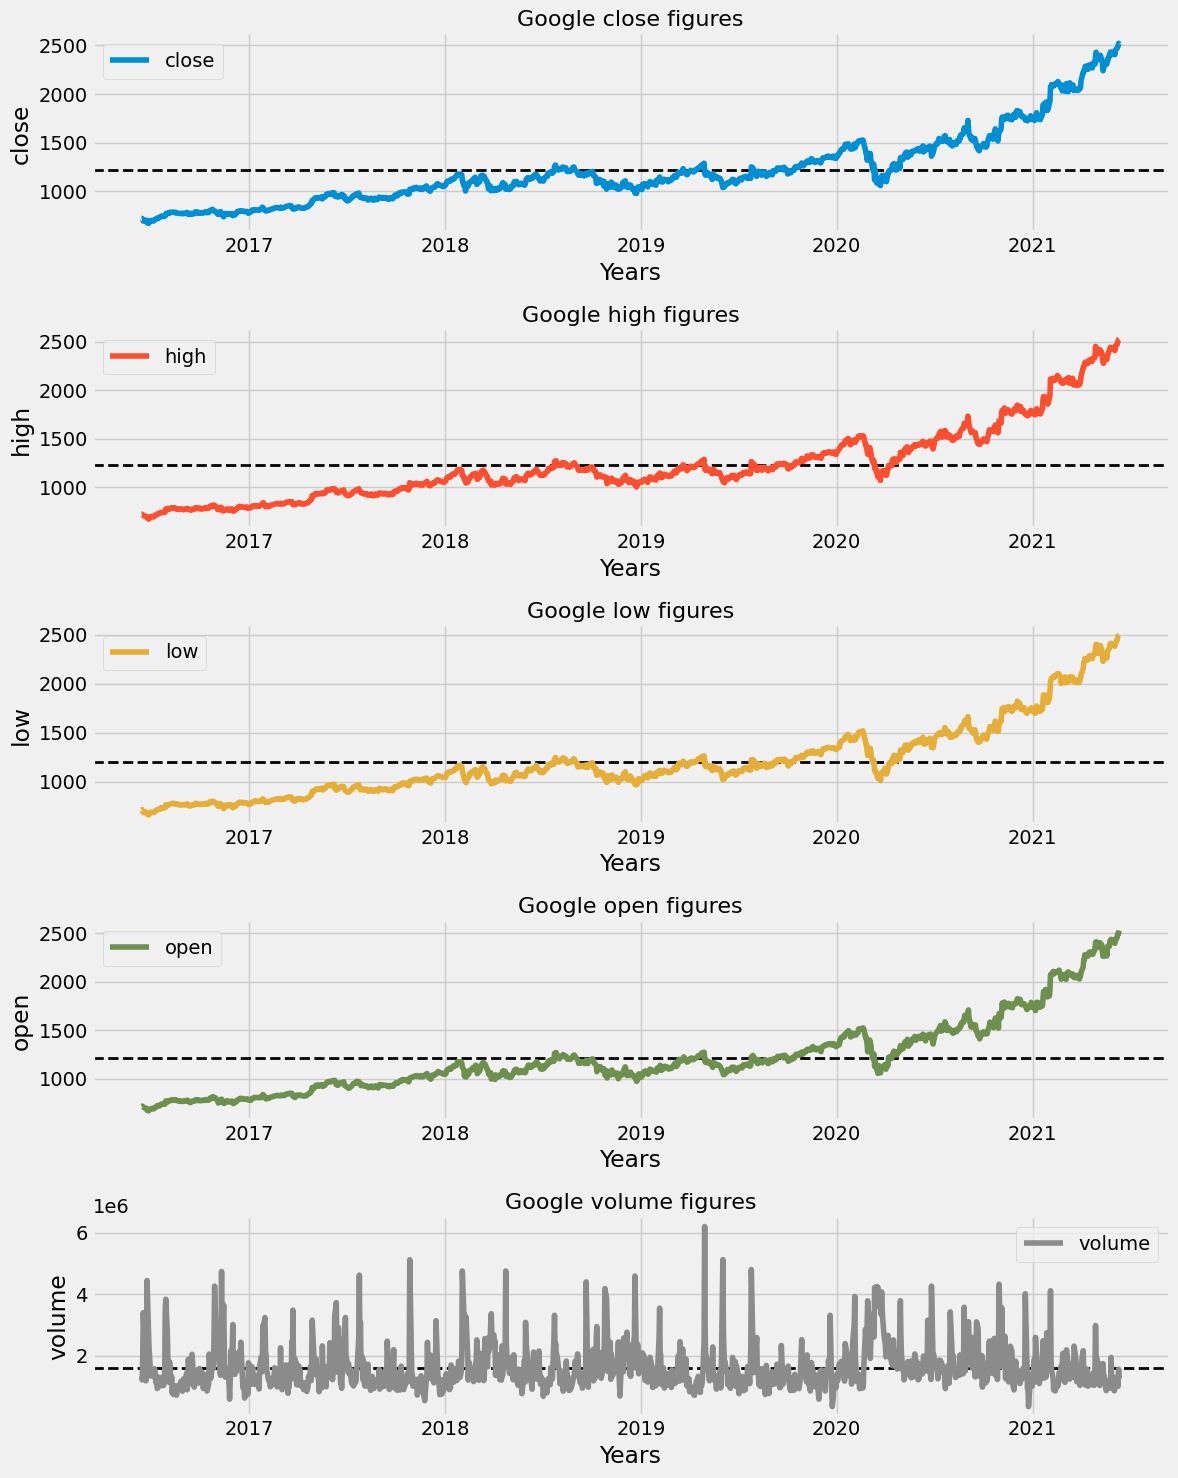

In [15]:
# @title Data visulization
a = 5  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter
colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized
fig = plt.figure(figsize=(12,15))
df.index = pd.to_datetime(df.index)
for i in range(len(df.columns)):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    # Plotting the line for each column in a different color
    plt.plot(df[df.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Adding a horizontal line for the average of the column
    plt.axhline(df[df.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    # Adding Title
    plt.title("Google "+ df.columns[i] + " figures", fontsize=16)
    plt.xlabel('Years')
    # Adding y axis label
    plt.ylabel(df.columns[i])
    #Adding Legend
    plt.legend([df.columns[i]])
    # Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

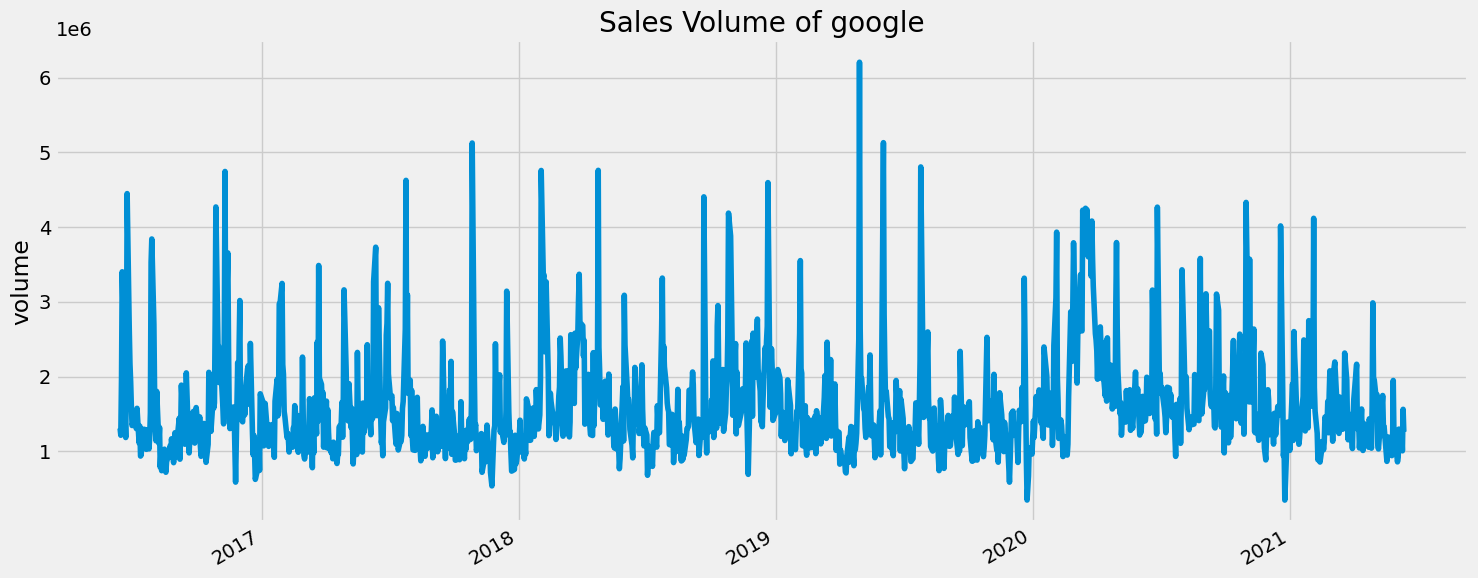

In [16]:
# @title Sales Volume of google
plt.figure(figsize=(15, 6))
df['volume'].plot()
plt.ylabel('volume')
plt.xlabel(None)
plt.title("Sales Volume of google")
plt.tight_layout()
plt.show()

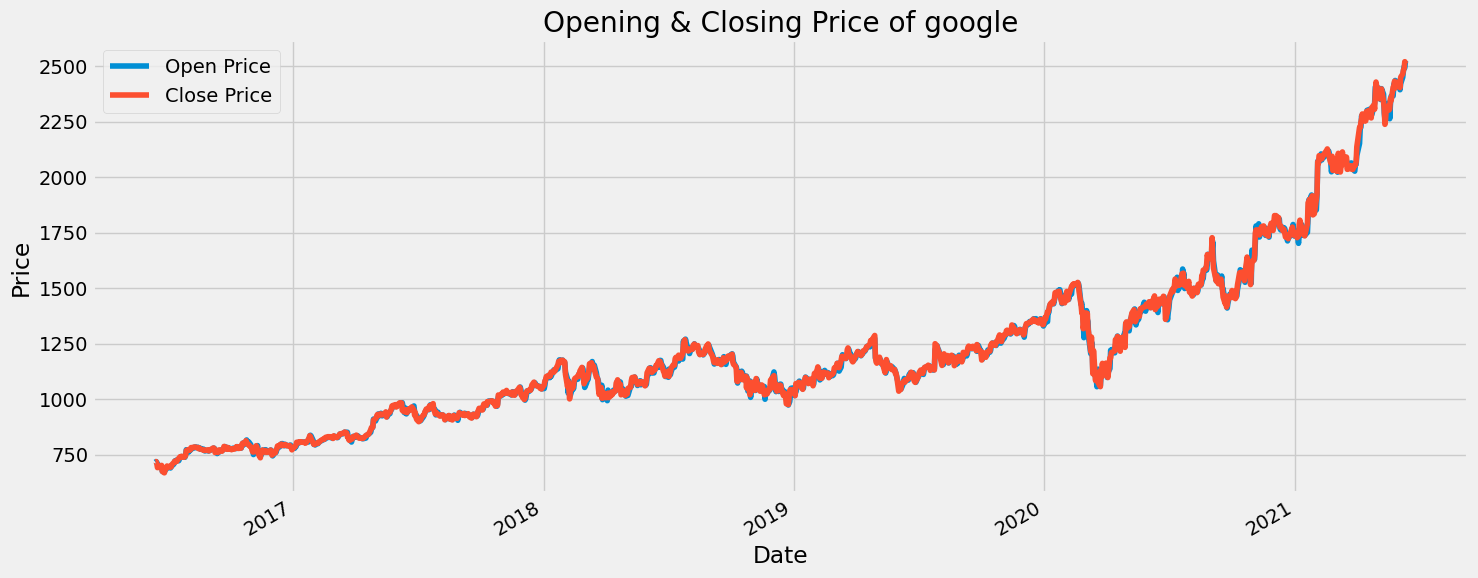

In [17]:
# @title Opening & Closing Price of google
plt.figure(figsize=(15, 6))
df['open'].plot()
df['close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.title("Opening & Closing Price of google")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

# Data preprocessing


In [18]:
# @title Choose prediction column
pre = df["close"]
pre = pd.DataFrame(pre)

data = pre.values

data.shape

(1258, 1)

In [19]:
# @title Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [20]:
# @title Split data 80% to Train , 20% to Test
train_size = int(len(data)*.80)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)
print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 1006 Test Size : 252
Train Size : 1006 Test Size : 252


In [21]:
# @title Creating a Training set with 10 time-steps and 1 output
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i, 0])
    y_train.append(train_data[i, 0])

In [22]:
# @title Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
# @title Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)


In [24]:
# Count rows of train, test, and validation sets
train_rows = len(x_train)
val_rows = len(x_val)

print("Number of rows in training set:", train_rows)
print("Number of rows in validation set:", val_rows)

print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_val:", y_val.shape)

Number of rows in training set: 796
Number of rows in validation set: 200
Shape of x_train: (796, 10)
Shape of y_train: (796,)
Shape of x_val: (200, 10)
Shape of y_val: (200,)


In [25]:
# @title Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [26]:
x_train.shape , y_train.shape

((796, 10, 1), (796,))

In [27]:
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)

In [33]:
# Reshape y_train and y_val
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

# Now the shapes should be:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of y_train: (796, 1)
Shape of y_val: (200, 1)


# Find the best LSTM model hyperparameters combination

In [34]:
# @title Define hyperparameter combinations

hyperparameters = {
    'num_lstm_layers': [1, 2],                # Number of LSTM layers
    'lstm_units': [16, 32],                   # Number of units/neurons in LSTM layers
    'dense_units': [16, 32],                  # Number of units/neurons in dense layers
    'activation': ['relu', 'tanh'],           # Activation function
    'optimizer': ['adam', 'rmsprop'],         # Optimizer
    'learning_rate': [0.001, 0.01],           # Learning rate
    'batch_size': [16, 32]                    # Batch size
}

In [35]:
# @title Generate all combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(*hyperparameters.values()))

In [ ]:
# Count the combinations
num_combinations = len(hyperparameter_combinations)
print("Number of hyperparameter combinations:", num_combinations)

Number of hyperparameter combinations: 128


In [ ]:
# @title LSTM model structure

results = []

for params in hyperparameter_combinations:
    # try:
        num_lstm_layers, lstm_units, dense_units, activation, optimizer_name, learning_rate, batch_size = params

        # Build model
        model = Sequential([
            LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)),
            *[LSTM(units=lstm_units, return_sequences=True) for _ in range(num_lstm_layers - 1)],
            LSTM(units=lstm_units),
            Dense(units=dense_units, activation=activation),
            Dense(units=1)
        ])

        # Compile model
        optimizer = optimizers.get(optimizer_name)
        optimizer.learning_rate = learning_rate
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

        callbacks = [EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)]
        # Train model
        history = model.fit(x_train, y_train, epochs=50, batch_size=batch_size, verbose=0, validation_split=0.2, callbacks=callbacks)

        # Evaluate model on validation set
        val_loss, val_mae = model.evaluate(x_val, y_val, verbose=0)

        # Save results
        results.append({
            'num_lstm_layers': num_lstm_layers,
            'lstm_units': lstm_units,
            'dense_units': dense_units,
            'activation': activation,
            'optimizer': optimizer_name,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'val_loss': val_loss,
            'val_mae': val_mae
        })
    # except Exception as e:
    #     print(f"Error occurred for parameters: {params}")
    #     print(e)


In [ ]:
# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Sort results by validation loss (or any other metric you're interested in)
results_df = results_df.sort_values(by=['val_mae','val_loss'])

# Print top 5 best performing models
print(results_df.head())


    num_lstm_layers  lstm_units  dense_units activation optimizer  \
11                1          16           16       tanh      adam   
19                1          16           32       relu      adam   
27                1          16           32       tanh      adam   
56                1          32           32       tanh      adam   
42                1          32           16       tanh      adam   

    learning_rate  batch_size  val_loss   val_mae  
11          0.010          32  0.000212  0.010149  
19          0.010          32  0.000227  0.010319  
27          0.010          32  0.000231  0.010511  
56          0.001          16  0.000238  0.010564  
42          0.010          16  0.000271  0.010754  


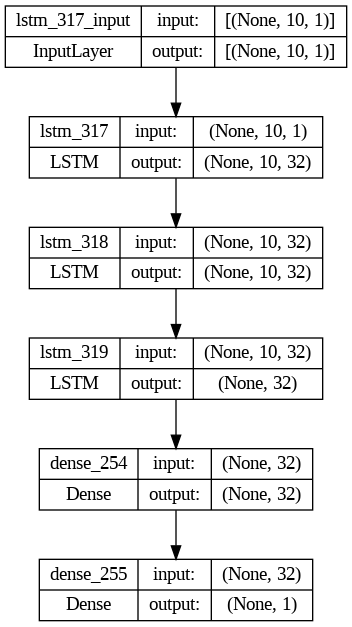

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

## Evaluation

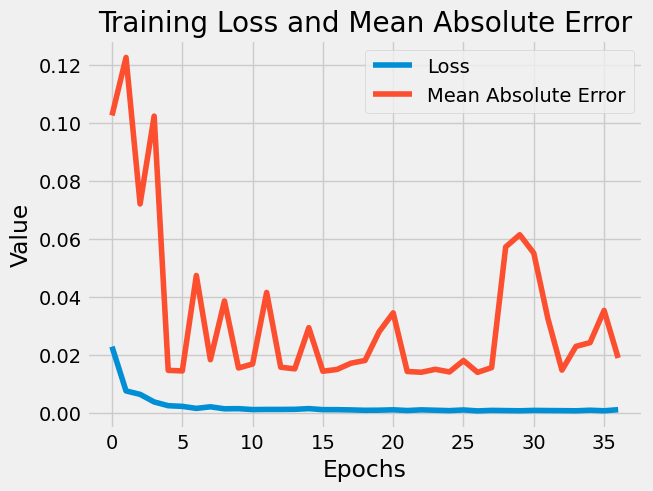

In [ ]:
# @title Training Loss and Mean Absolute Error
plt.plot(history.history["loss"])
plt.plot(history.history["val_mae"])
plt.legend(['Loss', 'Mean Absolute Error'])
plt.title("Training Loss and Mean Absolute Error")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.grid(True)
plt.show()



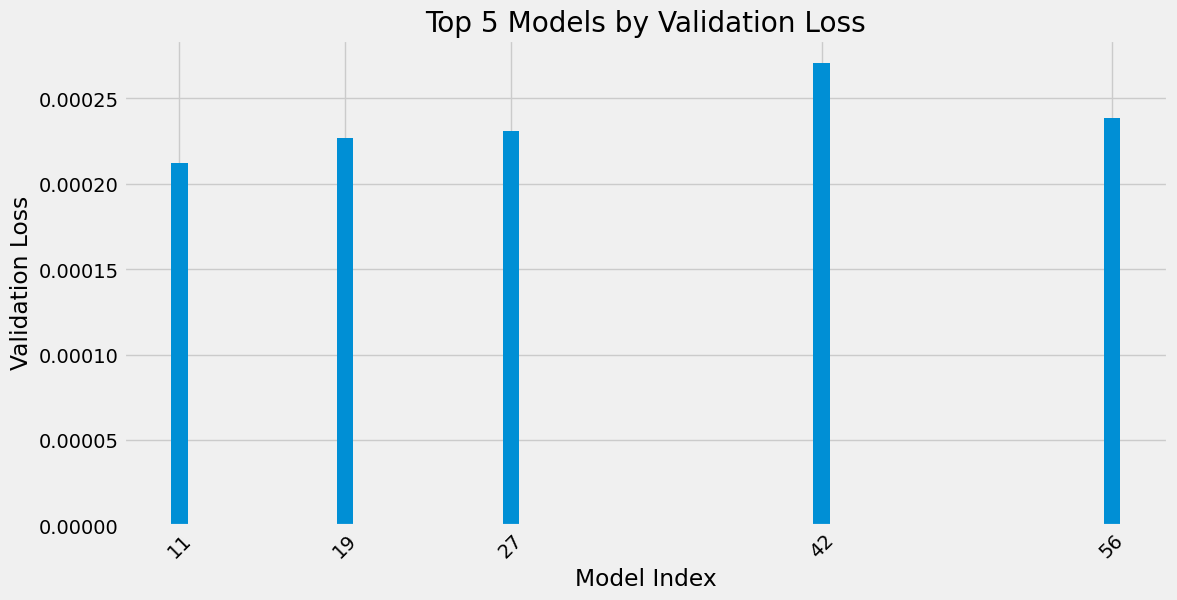

In [ ]:
# @title Bar plot of validation loss for top-performing models
plt.figure(figsize=(12, 6))
plt.bar(results_df.index[:5], results_df['val_loss'][:5])
plt.xlabel('Model Index')
plt.ylabel('Validation Loss')
plt.title('Top 5 Models by Validation Loss')
plt.xticks(results_df.index[:5], rotation=45)
plt.show()

The **model with index 40** has the lowest **Validation Loss**

---



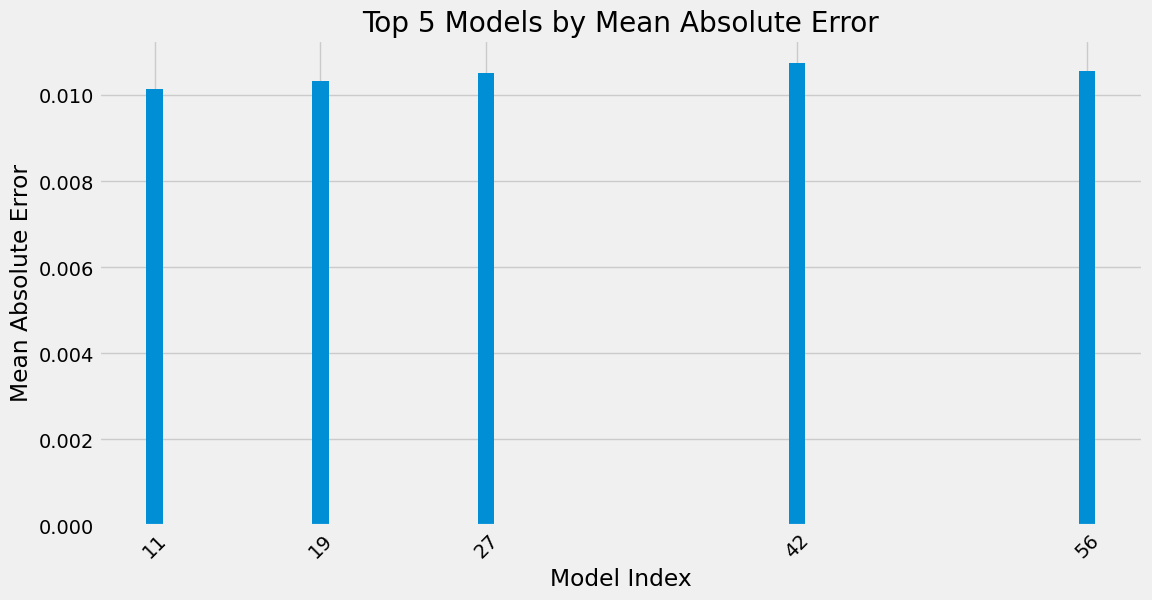

In [ ]:
# @title Bar plot of Mean Absolute Error for top-performing models
plt.figure(figsize=(12, 6))
plt.bar(results_df.index[:5], results_df['val_mae'][:5])
plt.xlabel('Model Index')
plt.ylabel('Mean Absolute Error')
plt.title('Top 5 Models by Mean Absolute Error')
plt.xticks(results_df.index[:5], rotation=45)
plt.show()

The **model with index 59** has the lowest **Mean Absolute Error**

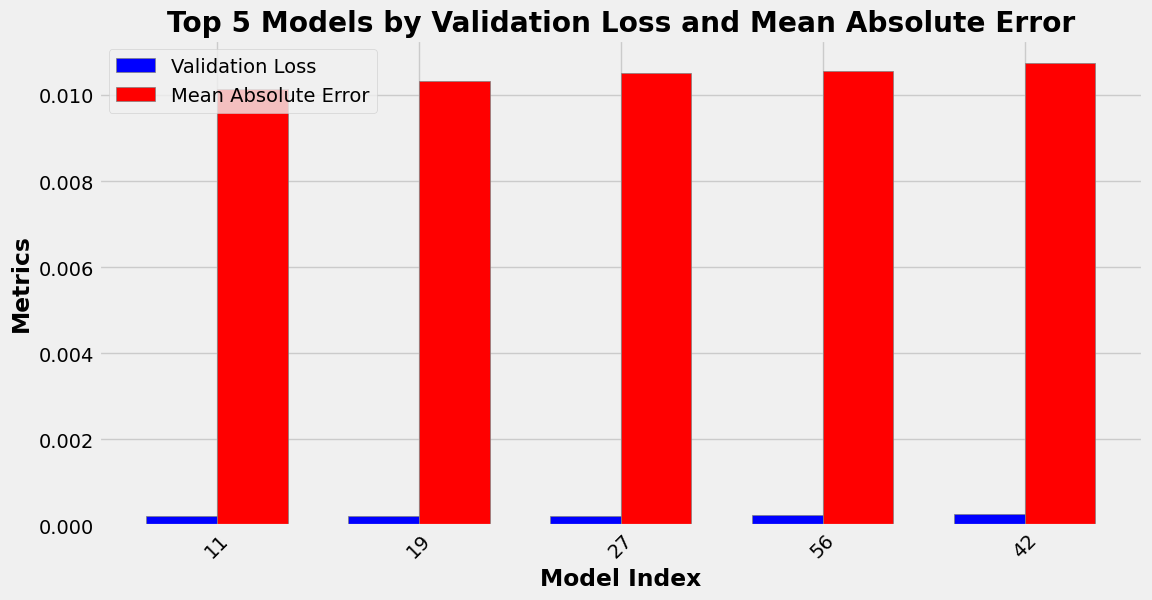

In [ ]:
# @title Top 5 Models by Validation Loss and Mean Absolute Error
import numpy as np

# Get the indices of the top 5 models
top_indices = results_df.index[:5]

# Get the validation loss and mean absolute error for the top 5 models
top_val_loss = results_df['val_loss'][:5]
top_val_mae = results_df['val_mae'][:5]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(top_indices))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, top_val_loss, color='b', width=bar_width, edgecolor='grey', label='Validation Loss')
plt.bar(r2, top_val_mae, color='r', width=bar_width, edgecolor='grey', label='Mean Absolute Error')

# Add xticks and labels
plt.xlabel('Model Index', fontweight='bold')
plt.ylabel('Metrics', fontweight='bold')
plt.title('Top 5 Models by Validation Loss and Mean Absolute Error', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(top_indices))], top_indices, rotation=45)
plt.legend()

# Show plot
plt.show()


# Experiment with the hyperparameters

Starting experiment with the hyperparameters of the best model (index=11) based on Mean Absolute Error.

## Model 1

> Comparison using different Dense units


In [109]:
# Hyperparameters from row 11 of the results dataframe
num_lstm_layers = 1
lstm_units = 16
dense_units = 16
activation = 'tanh'
optimizer_name = 'adam'
learning_rate = 0.010
batch_size = 32

# Start the timer
start_time = time.time()

# Build model
model = Sequential([
    LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    *[LSTM(units=lstm_units, return_sequences=True) for _ in range(num_lstm_layers - 1)],
    LSTM(units=lstm_units),
    Dense(units=dense_units, activation=activation),
    Dense(units=1)
])

# Compile model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print model summary
model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 16)            1152      
                                                                 
 lstm_13 (LSTM)              (None, 16)                2112      
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3553 (13.88 KB)
Trainable params: 3553 (13.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


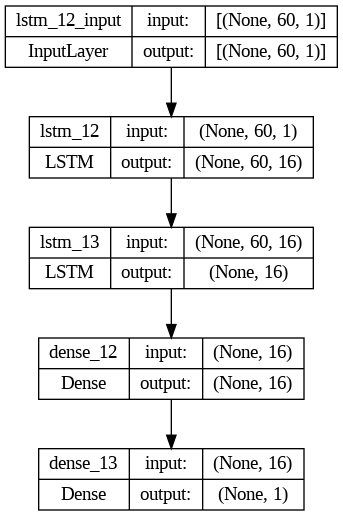

In [110]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [111]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 )

Epoch 1/100
28/28 [==============================] - 6s 39ms/step - loss: 0.0087 - mae: 0.0655
Epoch 2/100
28/28 [==============================] - 1s 38ms/step - loss: 5.3485e-04 - mae: 0.0185
Epoch 3/100
28/28 [==============================] - 1s 40ms/step - loss: 3.5556e-04 - mae: 0.0139
Epoch 4/100
28/28 [==============================] - 1s 40ms/step - loss: 3.3442e-04 - mae: 0.0136
Epoch 5/100
28/28 [==============================] - 1s 40ms/step - loss: 3.1635e-04 - mae: 0.0133
Epoch 6/100
28/28 [==============================] - 1s 39ms/step - loss: 3.0259e-04 - mae: 0.0130
Epoch 7/100
28/28 [==============================] - 1s 39ms/step - loss: 3.1914e-04 - mae: 0.0135
Epoch 8/100
28/28 [==============================] - 2s 60ms/step - loss: 2.8309e-04 - mae: 0.0126
Epoch 9/100
28/28 [==============================] - 2s 59ms/step - loss: 2.6114e-04 - mae: 0.0123
Epoch 10/100
28/28 [==============================] - 1s 38ms/step - loss: 2.7446e-04 - mae: 0.0125
Epoch 11/100


In [112]:
# End the timer
end_time = time.time()

# Calculate the training time
m1_training_time = end_time - start_time

### Evaluation

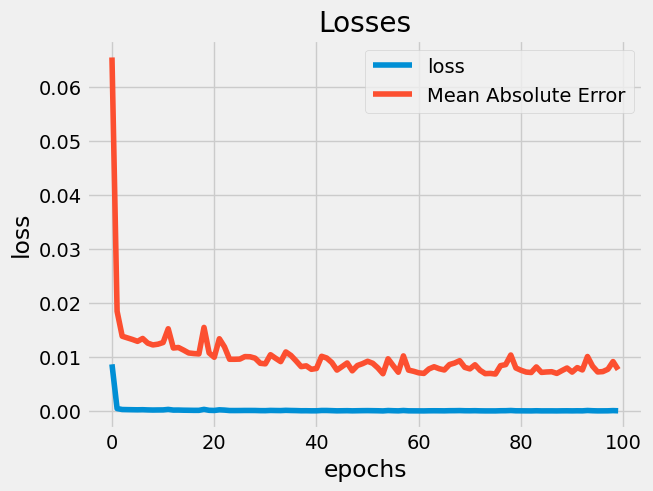

In [113]:
# @title Loss vs MAE
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend(['loss','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Prediction

In [114]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [115]:
x_test.shape , y_test.shape

((315, 60, 1), (315,))

In [116]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

10/10 [==============================] - 1s 12ms/step


(315, 1)

In [117]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 13.93


In [118]:
print("Loss:", history.history['loss'][-1])
print("Mean Absolute Error:", history.history['mae'][-1])

Loss: 0.00012194992450531572
Mean Absolute Error: 0.007747055497020483


In [119]:
print("Shape of predictions:", predictions.shape)
print("Shape of y_test:", y_test.shape)

Shape of predictions: (315, 1)
Shape of y_test: (1, 315)


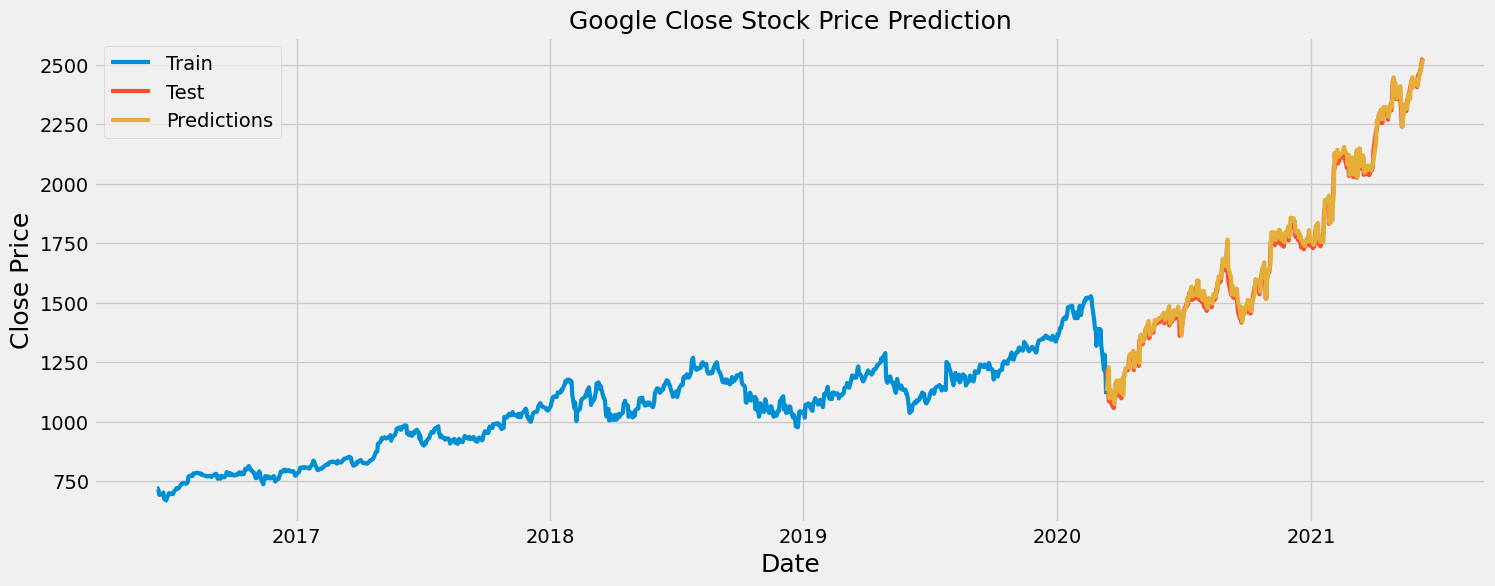

In [120]:
df.index = pd.to_datetime(df.index)

train = df.iloc[:train_size , 0:1]
test = df.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Google Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train.index, train['close'], linewidth= 3)  # Use index for train data
plt.plot(test.index, test['close'], linewidth= 3)    # Use index for test data
plt.plot(test.index, test["Predictions"], linewidth= 3)  # Use index for predictions
plt.legend(['Train', 'Test', 'Predictions'])

# Save the plot as an image file
plt.savefig('stock_price_prediction_plot_model_1.png')

# Show the plot
plt.show()

## Model 2

Change the dense_units = 64

In [121]:
# Hyperparameters
num_lstm_layers = 1
lstm_units = 16
dense_units = 64
activation = 'tanh'
optimizer_name = 'adam'
learning_rate = 0.010
batch_size = 32

# Start the timer
start_time = time.time()

# Build model
model = Sequential([
    LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    *[LSTM(units=lstm_units, return_sequences=True) for _ in range(num_lstm_layers - 1)],
    LSTM(units=lstm_units),
    Dense(units=dense_units, activation=activation),
    Dense(units=1)
])

# Compile model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print model summary
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 60, 16)            1152      
                                                                 
 lstm_15 (LSTM)              (None, 16)                2112      
                                                                 
 dense_14 (Dense)            (None, 64)                1088      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


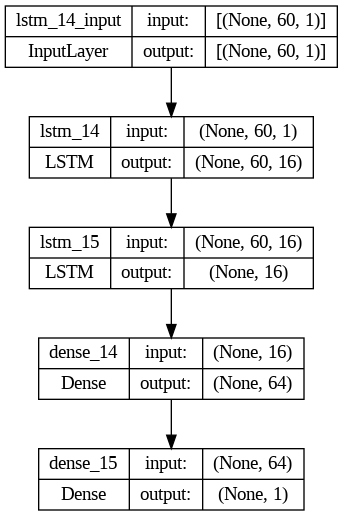

In [122]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [123]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 )

Epoch 1/100
28/28 [==============================] - 6s 38ms/step - loss: 0.0079 - mae: 0.0690
Epoch 2/100
28/28 [==============================] - 1s 38ms/step - loss: 6.3142e-04 - mae: 0.0196
Epoch 3/100
28/28 [==============================] - 1s 38ms/step - loss: 3.1353e-04 - mae: 0.0129
Epoch 4/100
28/28 [==============================] - 1s 40ms/step - loss: 2.9971e-04 - mae: 0.0127
Epoch 5/100
28/28 [==============================] - 1s 39ms/step - loss: 3.2608e-04 - mae: 0.0133
Epoch 6/100
28/28 [==============================] - 1s 39ms/step - loss: 3.2700e-04 - mae: 0.0137
Epoch 7/100
28/28 [==============================] - 1s 39ms/step - loss: 2.9514e-04 - mae: 0.0129
Epoch 8/100
28/28 [==============================] - 1s 39ms/step - loss: 2.7145e-04 - mae: 0.0124
Epoch 9/100
28/28 [==============================] - 1s 46ms/step - loss: 2.4544e-04 - mae: 0.0119
Epoch 10/100
28/28 [==============================] - 2s 64ms/step - loss: 2.2209e-04 - mae: 0.0111
Epoch 11/100


In [124]:
# End the timer
end_time = time.time()

# Calculate the training time
m2_training_time = end_time - start_time

### **Evaluation**

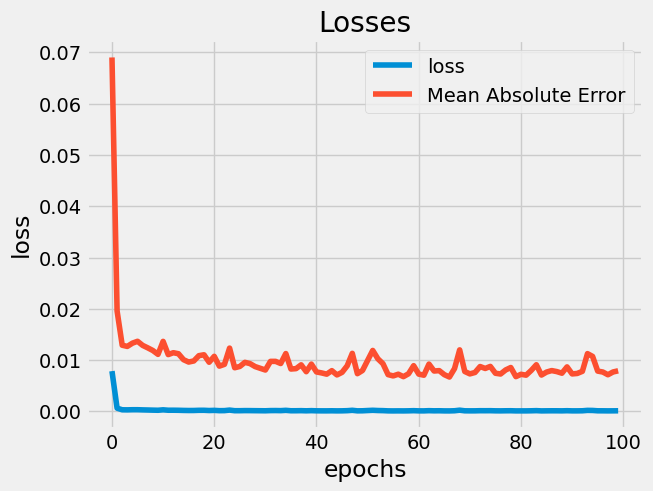

In [125]:
# Loss vs MAE
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend(['loss','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Prediction

In [126]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [127]:
x_test.shape , y_test.shape

((315, 60, 1), (315,))

In [128]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

10/10 [==============================] - 1s 13ms/step


(315, 1)

In [129]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 40.32


In [130]:
print("Loss:", history.history['loss'][-1])
print("Mean Absolute Error:", history.history['mae'][-1])

Loss: 0.0001182755222544074
Mean Absolute Error: 0.00791473314166069


In [131]:
print("Shape of predictions:", predictions.shape)
print("Shape of y_test:", y_test.shape)

Shape of predictions: (315, 1)
Shape of y_test: (1, 315)


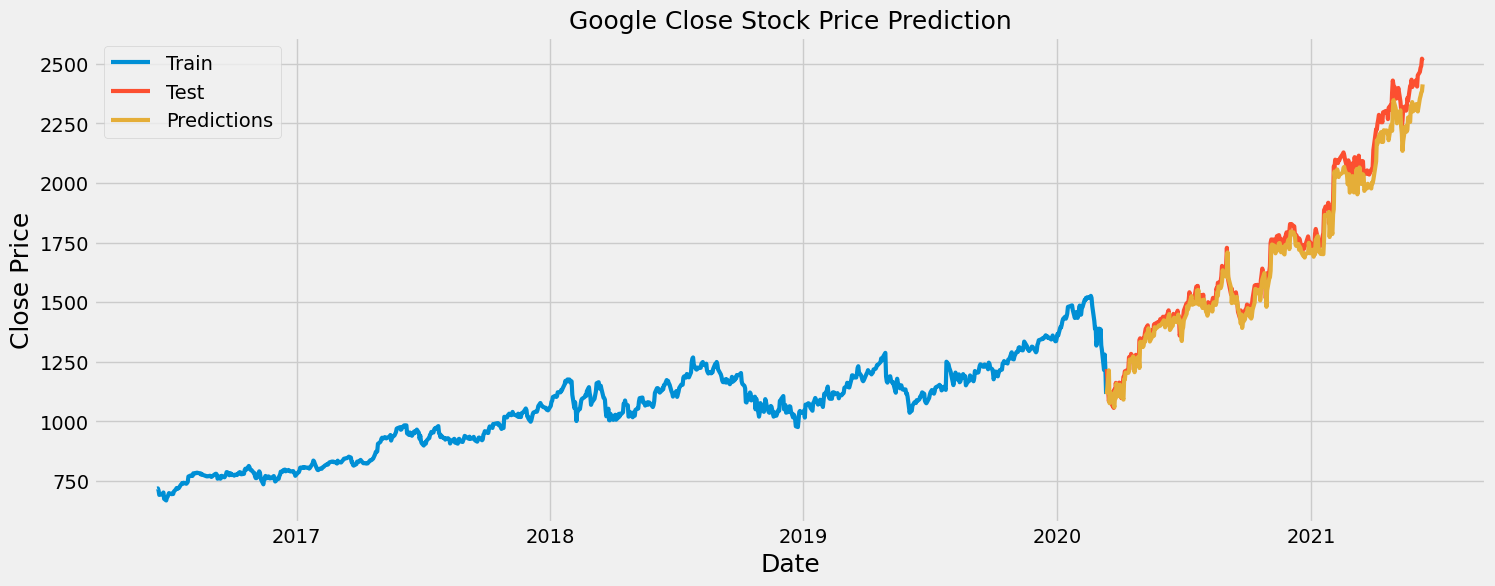

In [132]:
df.index = pd.to_datetime(df.index)

train = df.iloc[:train_size , 0:1]
test = df.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Google Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train.index, train['close'], linewidth= 3)  # Use index for train data
plt.plot(test.index, test['close'], linewidth= 3)    # Use index for test data
plt.plot(test.index, test["Predictions"], linewidth= 3)  # Use index for predictions
plt.legend(['Train', 'Test', 'Predictions'])

# Save the plot as an image file
plt.savefig('stock_price_prediction_plot_model_2.png')

# Show the plot
plt.show()

## Model 3

> Comparison using different Epoch number



Experiment using activation = 'relu' & dense_units = 32

In [188]:
# Hyperparameters
num_lstm_layers = 1
lstm_units = 16
dense_units = 32
activation = 'relu'
optimizer_name = 'adam'
learning_rate = 0.010
batch_size = 32

# Start the timer
start_time = time.time()

# Build model
model = Sequential([
    LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    *[LSTM(units=lstm_units, return_sequences=True) for _ in range(num_lstm_layers - 1)],
    LSTM(units=lstm_units),
    Dense(units=dense_units, activation=activation),
    Dense(units=1)
])

# Compile model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print model summary
model.summary()



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 60, 16)            1152      
                                                                 
 lstm_27 (LSTM)              (None, 16)                2112      
                                                                 
 dense_26 (Dense)            (None, 32)                544       
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


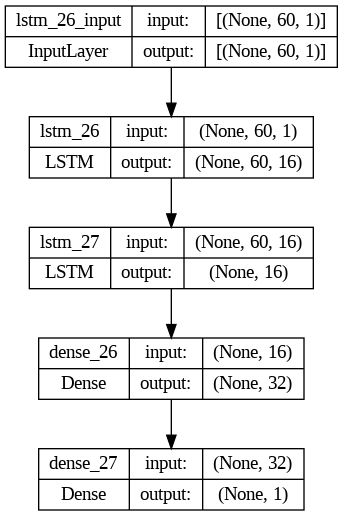

In [189]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [190]:
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 )

Epoch 1/100
28/28 [==============================] - 6s 62ms/step - loss: 0.0047 - mae: 0.0460
Epoch 2/100
28/28 [==============================] - 2s 55ms/step - loss: 5.0140e-04 - mae: 0.0175
Epoch 3/100
28/28 [==============================] - 1s 39ms/step - loss: 3.8799e-04 - mae: 0.0149
Epoch 4/100
28/28 [==============================] - 1s 39ms/step - loss: 4.5676e-04 - mae: 0.0165
Epoch 5/100
28/28 [==============================] - 1s 39ms/step - loss: 3.4772e-04 - mae: 0.0141
Epoch 6/100
28/28 [==============================] - 1s 38ms/step - loss: 3.0218e-04 - mae: 0.0130
Epoch 7/100
28/28 [==============================] - 1s 39ms/step - loss: 3.7644e-04 - mae: 0.0144
Epoch 8/100
28/28 [==============================] - 1s 39ms/step - loss: 3.2203e-04 - mae: 0.0135
Epoch 9/100
28/28 [==============================] - 1s 38ms/step - loss: 3.3292e-04 - mae: 0.0140
Epoch 10/100
28/28 [==============================] - 1s 38ms/step - loss: 2.5401e-04 - mae: 0.0120
Epoch 11/100


In [191]:
# End the timer
end_time = time.time()

# Calculate the training time
m3_training_time = end_time - start_time

### Evaluation

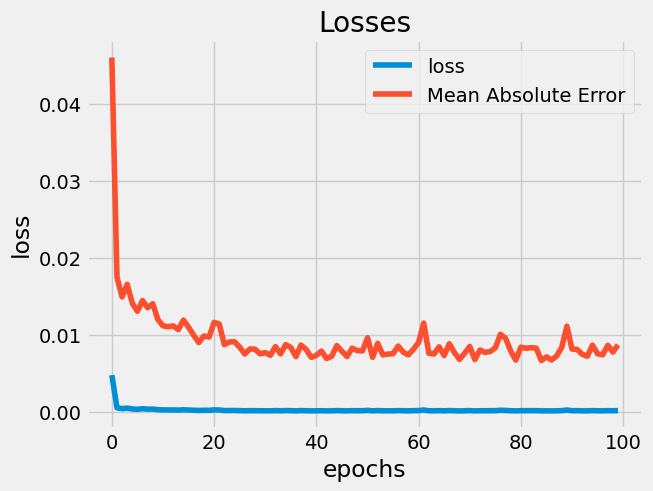

In [192]:
# @title Loss vs MAE
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend(['loss','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Prediction

In [193]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [194]:
x_test.shape , y_test.shape

((315, 60, 1), (315,))

In [195]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

10/10 [==============================] - 1s 12ms/step


(315, 1)

In [196]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 50.6


In [197]:
print("Loss:", history.history['loss'][-1])
print("Mean Absolute Error:", history.history['mae'][-1])

Loss: 0.00013405787467490882
Mean Absolute Error: 0.00867051724344492


In [198]:
print("Shape of predictions:", predictions.shape)
print("Shape of y_test:", y_test.shape)

Shape of predictions: (315, 1)
Shape of y_test: (1, 315)


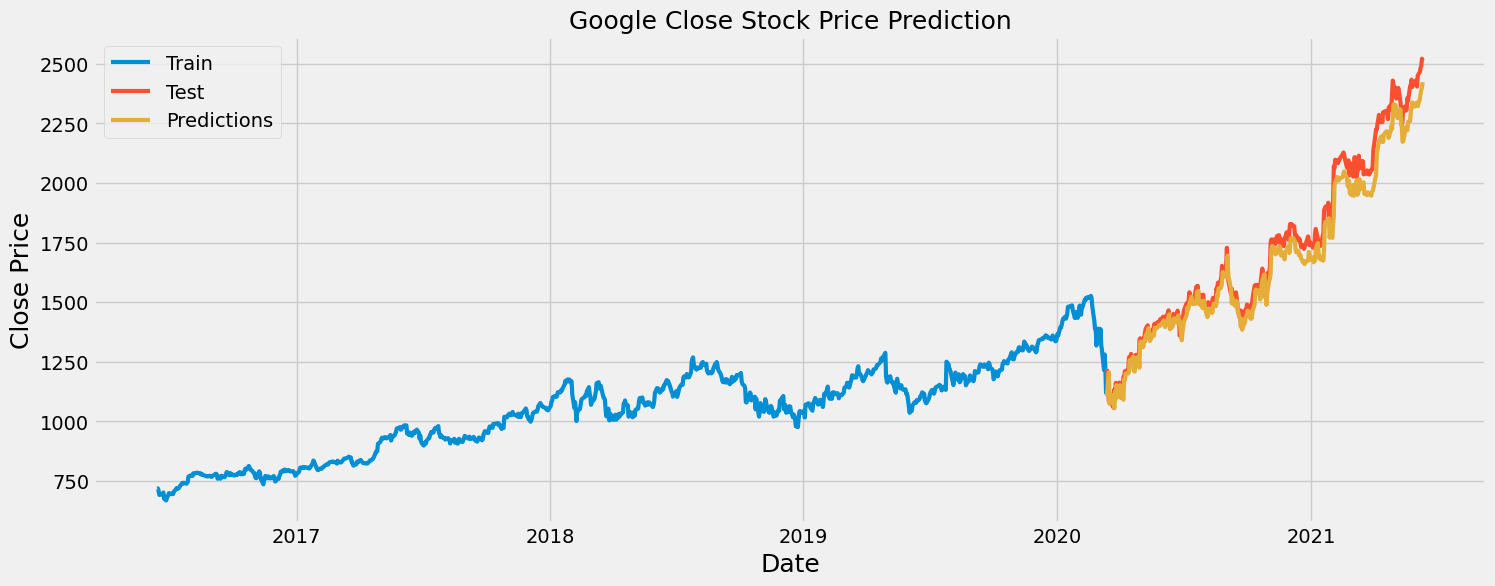

In [199]:
df.index = pd.to_datetime(df.index)

train = df.iloc[:train_size , 0:1]
test = df.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Google Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train.index, train['close'], linewidth= 3)  # Use index for train data
plt.plot(test.index, test['close'], linewidth= 3)    # Use index for test data
plt.plot(test.index, test["Predictions"], linewidth= 3)  # Use index for predictions
plt.legend(['Train', 'Test', 'Predictions'])

# Save the plot as an image file
plt.savefig('stock_price_prediction_plot_model_3.png')

# Show the plot
plt.show()

## Model 4





Change epochs to 300

In [200]:
# Hyperparameters
num_lstm_layers = 1
lstm_units = 16
dense_units = 32
activation = 'relu'
optimizer_name = 'adam'
learning_rate = 0.010
batch_size = 32

# Start the timer
start_time = time.time()

# Build model
model = Sequential([
    LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    *[LSTM(units=lstm_units, return_sequences=True) for _ in range(num_lstm_layers - 1)],
    LSTM(units=lstm_units),
    Dense(units=dense_units, activation=activation),
    Dense(units=1)
])

# Compile model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print model summary
model.summary()



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 60, 16)            1152      
                                                                 
 lstm_29 (LSTM)              (None, 16)                2112      
                                                                 
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


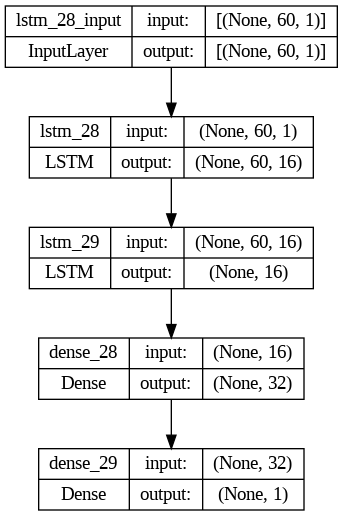

In [201]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [202]:
history = model.fit(x_train, y_train, epochs= 300, batch_size= 32 ) # Change epochs to 300

Epoch 1/300
28/28 [==============================] - 5s 39ms/step - loss: 0.0072 - mae: 0.0627
Epoch 2/300
28/28 [==============================] - 1s 39ms/step - loss: 6.6938e-04 - mae: 0.0196
Epoch 3/300
28/28 [==============================] - 2s 55ms/step - loss: 4.1934e-04 - mae: 0.0151
Epoch 4/300
28/28 [==============================] - 2s 62ms/step - loss: 3.8690e-04 - mae: 0.0145
Epoch 5/300
28/28 [==============================] - 1s 38ms/step - loss: 3.6554e-04 - mae: 0.0140
Epoch 6/300
28/28 [==============================] - 1s 39ms/step - loss: 5.1757e-04 - mae: 0.0176
Epoch 7/300
28/28 [==============================] - 1s 38ms/step - loss: 4.2499e-04 - mae: 0.0156
Epoch 8/300
28/28 [==============================] - 1s 39ms/step - loss: 3.7049e-04 - mae: 0.0141
Epoch 9/300
28/28 [==============================] - 1s 38ms/step - loss: 3.3193e-04 - mae: 0.0134
Epoch 10/300
28/28 [==============================] - 1s 37ms/step - loss: 3.0678e-04 - mae: 0.0129
Epoch 11/300


In [203]:
# End the timer
end_time = time.time()

# Calculate the training time
m4_training_time = end_time - start_time

### Evaluation

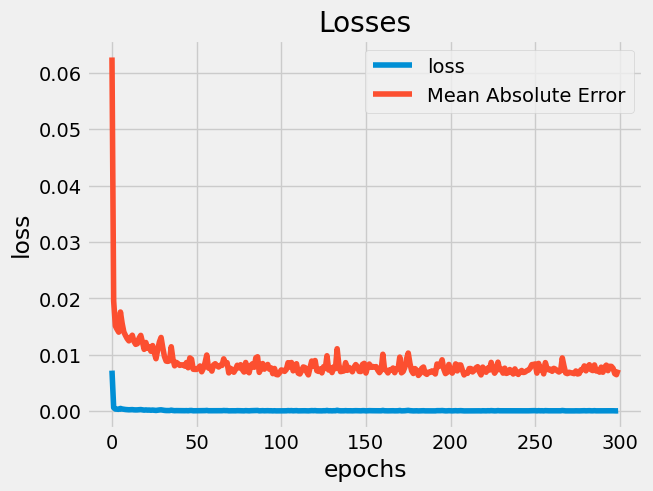

In [204]:
# @title Loss vs MAE
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.legend(['loss','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Prediction

In [205]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [206]:
x_test.shape , y_test.shape

((315, 60, 1), (315,))

In [207]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

10/10 [==============================] - 1s 11ms/step


(315, 1)

In [208]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)

print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 78.4


In [209]:
print("Loss:", history.history['loss'][-1])
print("Mean Absolute Error:", history.history['mae'][-1])

Loss: 0.00010239860421279445
Mean Absolute Error: 0.007403783034533262


In [210]:
print("Shape of predictions:", predictions.shape)
print("Shape of y_test:", y_test.shape)

Shape of predictions: (315, 1)
Shape of y_test: (1, 315)


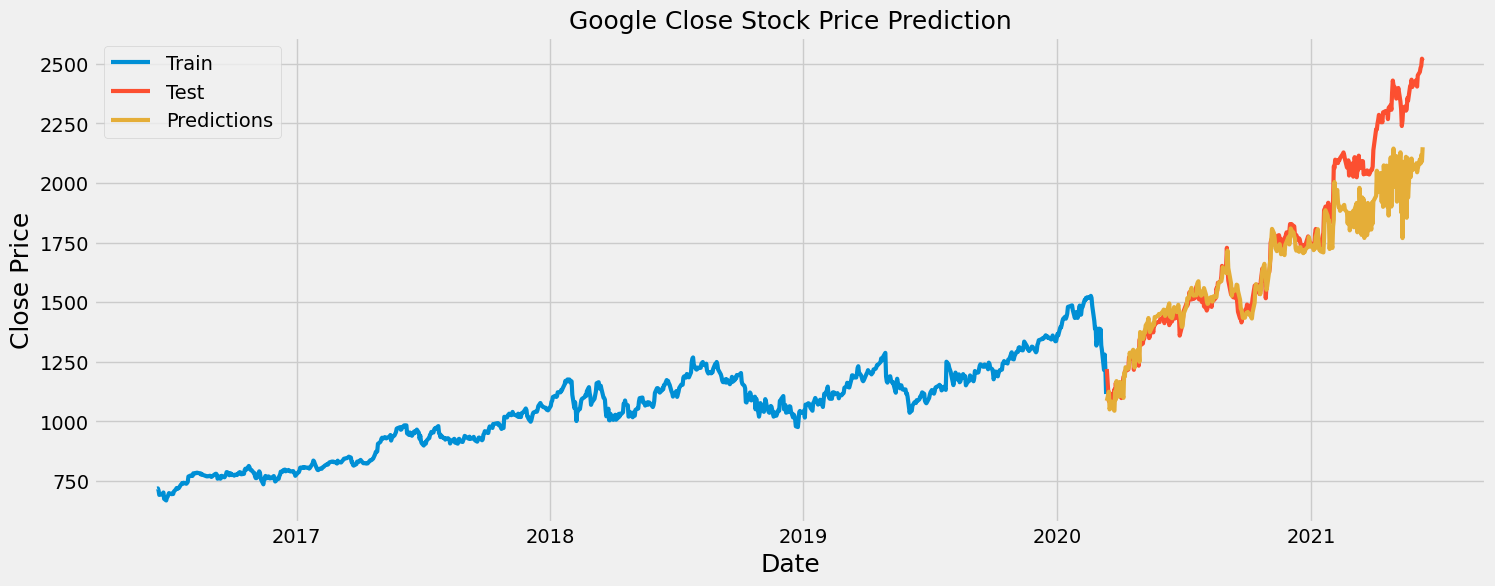

In [213]:
df.index = pd.to_datetime(df.index)

# Then proceed with your code for splitting train and test sets and plotting
train = df.iloc[:train_size , 0:1]
test = df.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Google Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train.index, train['close'], linewidth= 3)  # Use index for train data
plt.plot(test.index, test['close'], linewidth= 3)    # Use index for test data
plt.plot(test.index, test["Predictions"], linewidth= 3)  # Use index for predictions
plt.legend(['Train', 'Test', 'Predictions'])

# Save the plot as an image file
plt.savefig('stock_price_prediction_plot_model_4.png')

# Show the plot
plt.show()

## Training times of the four models

In [212]:
print("Training time for Model 1:", m1_training_time)
print("Training time for Model 2:", m2_training_time)
print("Training time for Model 3:", m3_training_time)
print("Training time for Model 4:", m4_training_time)

Training time for Model 1: 147.42933869361877
Training time for Model 2: 147.4405288696289
Training time for Model 3: 146.65599131584167
Training time for Model 4: 364.0244059562683
